# Machine Learning

## Objetivo
El objetivo de la práctica es simple: abordar un problema de Machine Learning realista siguiendo la metodología y buenas prácticas explicadas durante las clases teóricas. Por tanto, en estas instrucciones no se especifican los pasos exactos que el alumno tiene que llevar a cabo para realizar esta tarea con éxito; es parte del trabajo aplicar las técnicas de procesamiento/transformación de variables que mejor se adecúen al problema, identificar
los modelos que proporcionen prestaciones óptimas, las variables potencialmente más relevantes y la métrica adecuada para contrastar los distintos modelos. Aún así, se proporciona una pequeña guía de los pasos necesarios. Las posibilidades son amplias, así que es recomendable abordar una aproximación incremental: comenzar por soluciones sencillas para progresivamente aumentar la complejidad de las técnicas utilizadas.

A diferencia de los datasets utilizados en las clases, este está compuesto por datos reales, es decir, precisa de un análisis y limpieza mayores. Por el mismo motivo no se pretende obtener unos resultados espectaculares, es suficiente con que sean decentes; se valorará mucho más que el proceso seguido tenga sentido y no contenga errores graves de concepto.

## Conjunto de datos
El conjunto de datos escogido es éste, extraído de Airbnb mediante técnicas de scraping.
Dentro de las opciones recomiendo utilizar el extract (“Only the 14780 selected records”), ya que minimiza el tiempo de ejecución y evita problemas de memoria en equipos con menos prestaciones.

## Tarea
Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos
disponibles.

1. Preparación de datos: División train/test
2. Análisis exploratorio, por ejemplo:
    a. Head, describe, dtypes, etc.
    b. Outliers
    c. Correlación
3. Preprocesamiento:
    a. Eliminación de variables, mediante selección (random forest/Lasso), alta correlación, alto porcentaje de missings, o el método que se considere oportuno.
    b. Generación de variables
4. Modelado:
    a. Cross validation
    b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis comparar entre ellos.
5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente

## 00. Carga del archivo

In [117]:
import pandas as pd

data = pd.read_csv('./airbnb-listings.csv',sep=';', decimal='.')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5690903,https://www.airbnb.com/rooms/5690903,20170508161515,2017-05-08,Superb Penthouse to Piazza Navona,"The wonderful penthouse, located on the 4th fl...","The wonderful penthouse, located in the histor...","The wonderful penthouse, located on the 4th fl...",none,"Piazza Navona, near which you will find our wo...",...,10.0,10.0,10.0,NaN,NaN,moderate_new,12.0,2.41,"41.90121357758296, 12.472211604218272","Host Has Profile Pic,Host Identity Verified,Is..."
1,13244834,https://www.airbnb.com/rooms/13244834,20170507222235,2017-05-08,middle of Berlins city,I'm letting a room in my cosy city centre apar...,I'm letting a room in my cosy city centre apar...,I'm letting a room in my cosy city centre apar...,none,Anything you need is close by e.g. German bake...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,6.18,"52.527281757764904, 13.409987782850974","Host Has Profile Pic,Instant Bookable"
2,17840313,https://www.airbnb.com/rooms/17840313,20170407214119,2017-04-08,Apartamento Loft en HUERTAS,"Apartamento tipo loft, con una decoración mode...","El loft con una altura total de 4,20m, está ...","Apartamento tipo loft, con una decoración mode...",none,"Es un barrio peatonal, restringido el tráfico ...",...,10.0,10.0,8.0,NaN,NaN,strict,5.0,1.00,"40.41362312028243, -3.6976184319961782","Host Has Profile Pic,Host Identity Verified,Is..."
3,8097994,https://www.airbnb.com/rooms/8097994,20170407214119,2017-04-08,Luminous flat - Facing Prado Museum,It's a spacious flat in a historical building ...,"Ubicado frente al Museo del Prado, a 5 minutos...",It's a spacious flat in a historical building ...,none,Considerado el barrio más bonito y con más enc...,...,9.0,10.0,9.0,NaN,NaN,strict,1.0,2.42,"40.4135865274668, -3.6939599340592806","Host Has Profile Pic,Host Identity Verified,Is..."
4,12964587,https://www.airbnb.com/rooms/12964587,20170407214119,2017-04-08,Nice room with views to the squarE,This charming and modern guest house is situat...,La habitacion tiene unas vistas impresionantes...,This charming and modern guest house is situat...,none,"We have a vending machine with snacks, water, ...",...,9.0,10.0,7.0,NaN,NaN,moderate,2.0,0.43,"40.419791835735026, -3.6987866621594794","Host Has Profile Pic,Host Identity Verified,Is..."


In [118]:
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [119]:
# Filtrado de datos para quedarnos únicamente con Madrid

data_madrid = data[data['City'] == 'Madrid']
data_madrid.head()


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
2,17840313,https://www.airbnb.com/rooms/17840313,20170407214119,2017-04-08,Apartamento Loft en HUERTAS,"Apartamento tipo loft, con una decoración mode...","El loft con una altura total de 4,20m, está ...","Apartamento tipo loft, con una decoración mode...",none,"Es un barrio peatonal, restringido el tráfico ...",...,10.0,10.0,8.0,NaN,NaN,strict,5.0,1.00,"40.41362312028243, -3.6976184319961782","Host Has Profile Pic,Host Identity Verified,Is..."
3,8097994,https://www.airbnb.com/rooms/8097994,20170407214119,2017-04-08,Luminous flat - Facing Prado Museum,It's a spacious flat in a historical building ...,"Ubicado frente al Museo del Prado, a 5 minutos...",It's a spacious flat in a historical building ...,none,Considerado el barrio más bonito y con más enc...,...,9.0,10.0,9.0,NaN,NaN,strict,1.0,2.42,"40.4135865274668, -3.6939599340592806","Host Has Profile Pic,Host Identity Verified,Is..."
4,12964587,https://www.airbnb.com/rooms/12964587,20170407214119,2017-04-08,Nice room with views to the squarE,This charming and modern guest house is situat...,La habitacion tiene unas vistas impresionantes...,This charming and modern guest house is situat...,none,"We have a vending machine with snacks, water, ...",...,9.0,10.0,7.0,NaN,NaN,moderate,2.0,0.43,"40.419791835735026, -3.6987866621594794","Host Has Profile Pic,Host Identity Verified,Is..."
5,16876906,https://www.airbnb.com/rooms/16876906,20170407214119,2017-04-08,Iluminada y confortable Habitacion de Madrid...,"Lugares de interés: Madrid Rio, hermoso parque...","sitio centrico, cerca del metro de marquez de ...","Lugares de interés: Madrid Rio, hermoso parque...",none,"tiene cerca mercados el metro, ferreterías, óp...",...,10.0,9.0,9.0,NaN,NaN,strict,1.0,4.58,"40.396227528599894, -3.7207813812956827","Host Has Profile Pic,Requires License"
6,17965232,https://www.airbnb.com/rooms/17965232,20170407214119,2017-04-08,Habitación privada Zona Río Manzanares,"Las mejores vistas del Centro de Madrid, muy b...",NaN,"Las mejores vistas del Centro de Madrid, muy b...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.40506361035826, -3.7293159328630114","Host Has Profile Pic,Is Location Exact,Require..."


In [120]:
# Eliminación de columnas no necesarias
columnas_a_conservar = ['Security Deposit', 'Availability 30', 'Availability 60',
                        'Availability 90', 'Availability 365', 'Review Scores Rating',
                        'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Property Type',
                        'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
                        'Price', 'Cleaning Fee', 'Guests Included', 'Extra People',
                        'Cancellation Policy', 'Square Feet', 'Minimum Nights', 'Maximum Nights']

data_madrid = data_madrid[columnas_a_conservar]

data_madrid.columns

Index(['Security Deposit', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Review Scores Rating',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Price', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Cancellation Policy', 'Square Feet', 'Minimum Nights',
       'Maximum Nights'],
      dtype='object')

## 01. Preparación de datos: División train/test

In [121]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de train y test
# El 20% de los datos se utilizará para pruebas, mientras que el restante 80% se utilizará para entrenamiento
train, test = train_test_split(data_madrid, test_size=0.2, random_state=42)

# Guardado de los conjuntos de train y test en CSV
train.to_csv('./train_madrid.csv', sep=';', index=False, decimal='.')
test.to_csv('./test_madrid.csv', sep=';', index=False, decimal='.')

# Carga del df de train y análisis
data_train = pd.read_csv('./train_madrid.csv', sep=';', decimal='.')

print(data_train.head())
print(data_train.describe())
print(data_train.dtypes)

   Security Deposit  Availability 30  Availability 60  Availability 90  \
0               NaN                3                9               16   
1               NaN                8                8                8   
2             200.0                9               23               47   
3               NaN                0                0                6   
4               NaN                0                4               34   

   Availability 365  Review Scores Rating Neighbourhood Cleansed  \
0               176                  40.0                 Cortes   
1                46                  93.0               Justicia   
2               208                  93.0            Universidad   
3               261                  80.0               Justicia   
4               309                   NaN               Justicia   

  Neighbourhood Group Cleansed Property Type        Room Type  ...  Beds  \
0                       Centro     Apartment  Entire home/apt  ...   2

In [122]:
# Análisis y limpieza de NA

# %NA por columna
porcentaje_na = data_train.isnull().mean() * 100

# Resultado
print("Porcentaje de NA por columna:")
print(porcentaje_na)

# Mayoría de NA
columnas_con_na = porcentaje_na[porcentaje_na >= 50].index

# Eliminación de columnas
data_train = data_train.drop(columns=columnas_con_na)

# Cambio de NA por 0 para el importe de la limpieza (tomando como que si está nulo es gratis)
data_train['Cleaning Fee'] = data_train['Cleaning Fee'].fillna(0)

# Resultado tras limpieza de NA
print(data_train.columns)


Porcentaje de NA por columna:
Security Deposit                57.359205
Availability 30                  0.000000
Availability 60                  0.000000
Availability 90                  0.000000
Availability 365                 0.000000
Review Scores Rating            21.306200
Neighbourhood Cleansed           0.000000
Neighbourhood Group Cleansed     0.000000
Property Type                    0.000000
Room Type                        0.000000
Accommodates                     0.000000
Bathrooms                        0.425935
Bedrooms                         0.208235
Beds                             0.435400
Bed Type                         0.000000
Price                            0.075722
Cleaning Fee                    40.785613
Guests Included                  0.000000
Extra People                     0.000000
Cancellation Policy              0.000000
Square Feet                     96.100331
Minimum Nights                   0.000000
Maximum Nights                   0.000000
dtyp

## 02. Análisis exploratorio, por ejemplo:
    a. Head, describe, dtypes, etc.
    b. Outliers
    c. Correlación

Descripción de las variables numéricas:
       Availability 30  Availability 60  Availability 90  Availability 365  \
count     10565.000000     10565.000000     10565.000000      10565.000000   
mean          8.651680        22.752485        39.809560        205.174728   
std           9.003009        19.363846        29.194034        126.982604   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         5.000000        13.000000         83.000000   
50%           6.000000        20.000000        38.000000        247.000000   
75%          13.000000        37.000000        65.000000        320.000000   
max          30.000000        60.000000        90.000000        365.000000   

       Review Scores Rating  Accommodates     Bathrooms      Bedrooms  \
count           8314.000000  10565.000000  10520.000000  10543.000000   
mean              91.703392      3.184761      1.250238      1.293749   
std                8.777059      1.991

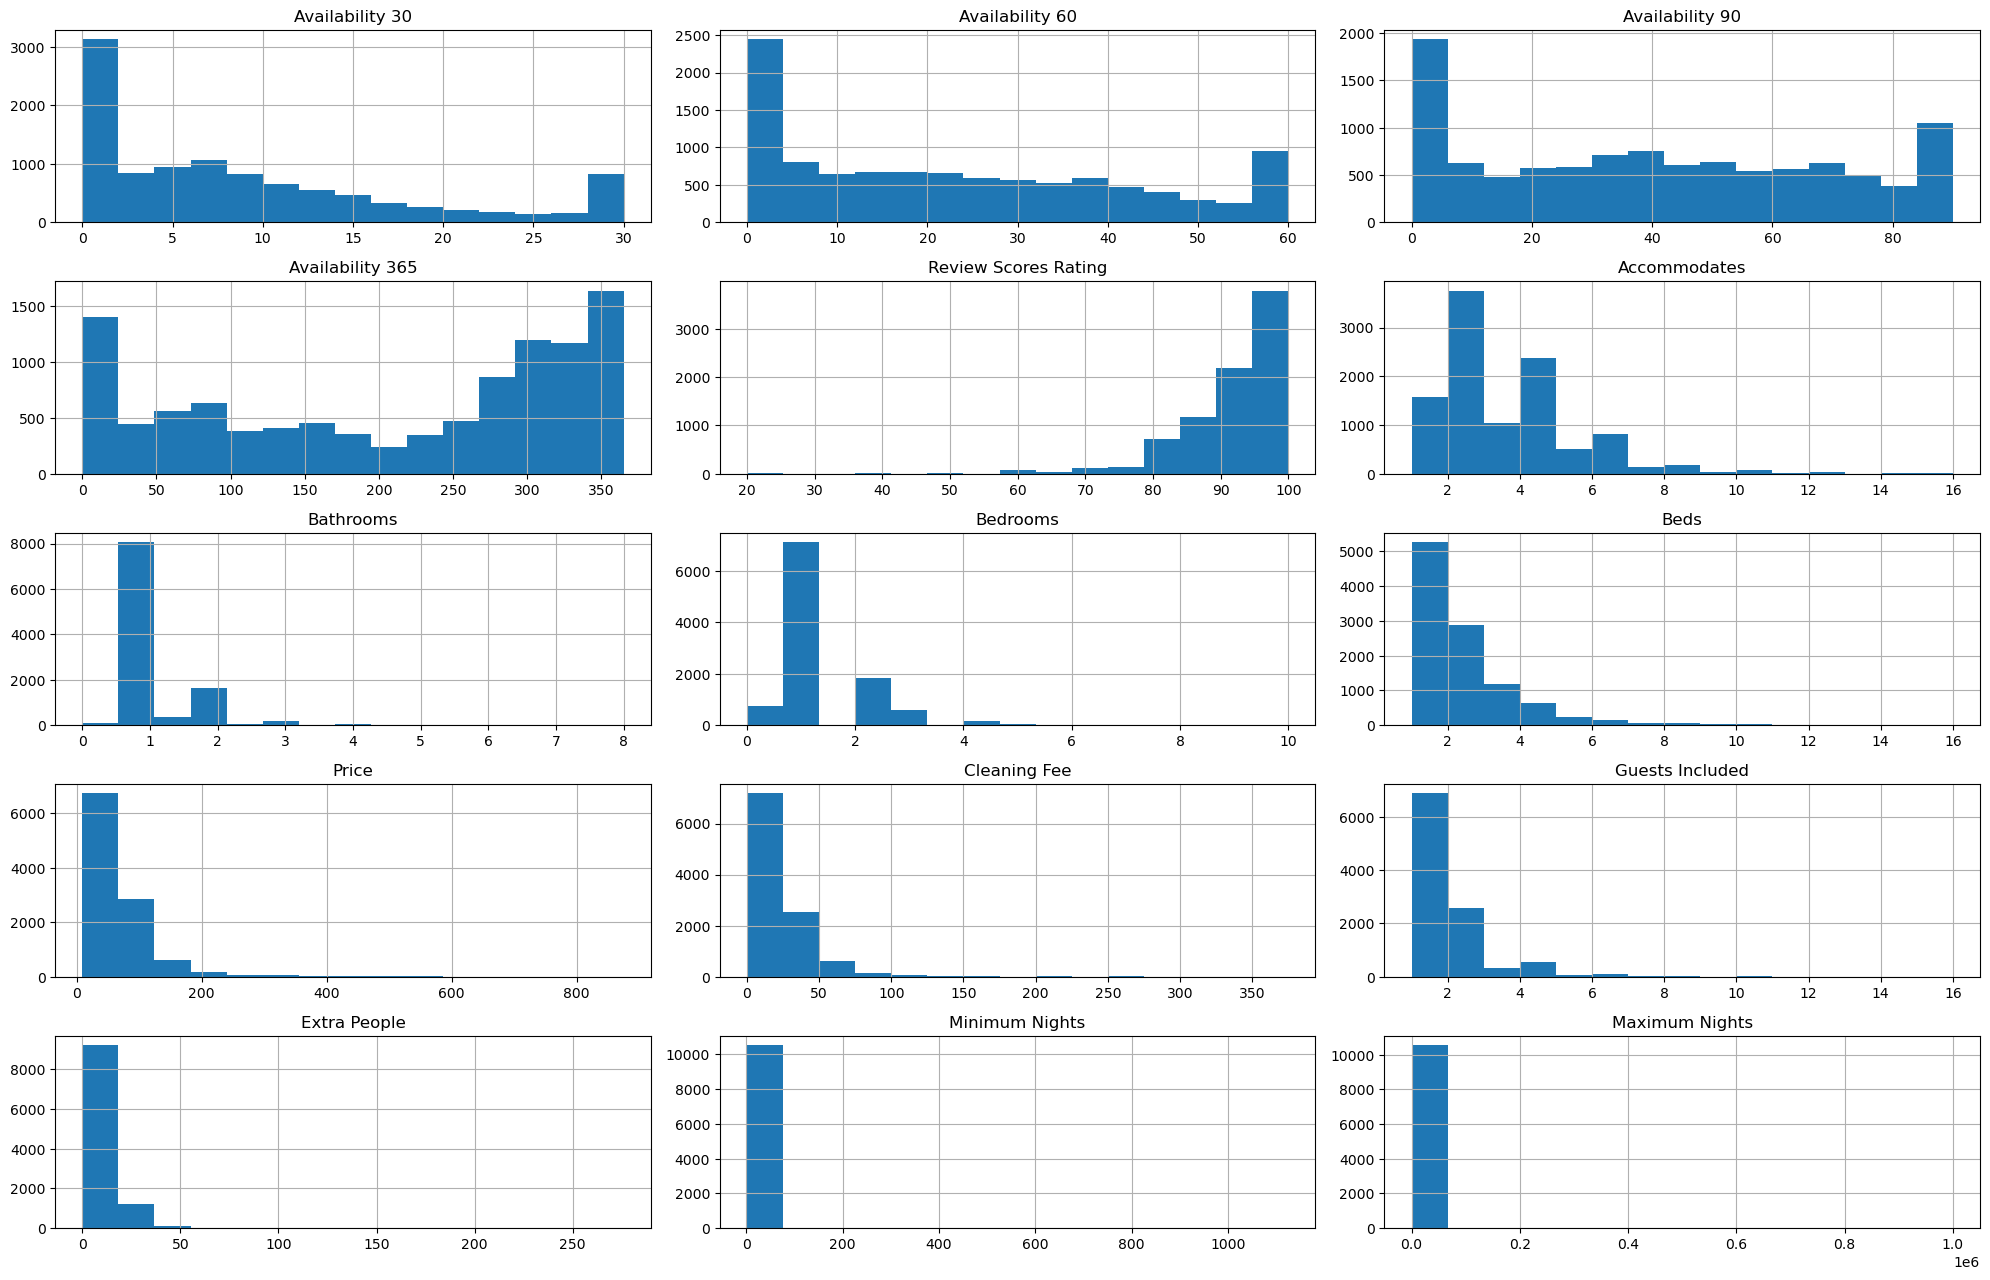

In [123]:
# Análisis de las variables numéricas y categóricas

# Variables numéricas
descripcion_numerica = data_train.describe()

# Resultado
print("Descripción de las variables numéricas:")
print(descripcion_numerica)

# Variables categóricas
descripcion_categorica = data_train.describe(include=['object'])

# Resultado
print("\nDescripción de las variables categóricas:")
print(descripcion_categorica)

# Valores únicos
for columna in data_train.select_dtypes(include=['object']).columns:
    print(f"\nValores únicos en {columna}:")
    print(data_train[columna].unique())

# Histogramas
import matplotlib.pyplot as plt

columnas_numericas = data_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))

# Histograma para cada variable numérica
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(len(columnas_numericas)//3 + 1, 3, i)
    data_train[columna].hist(bins=15)
    plt.title(columna)

# Resultado
plt.tight_layout()
plt.show()



# Conclusiones hasta el momento

## Variables numéricas:
### Disponibilidad: 
La disponibilidad promedio varía a lo largo del año, comenzando en relativamente baja para los próximos 30 días y aumentando significativamente para el período anual completo. Esto sugiere que muchos anfitriones mantienen sus propiedades disponibles para alquileres a largo plazo.
### Reviews: 
Las reviews tienen un promedio alto (aproximadamente 91.70), lo que indica una satisfacción general positiva entre los huéspedes. La desviación estándar relativamente baja sugiere que la mayoría de las propiedades reciben calificaciones altas consistentemente.
### Capacidad y habitaciones: 
La capacidad promedio de alojamiento y el número de baños, dormitorios y camas indican que las propiedades están generalmente equipadas para acomodar grupos pequeños o familias, con la mayoría de las propiedades diseñadas para alojar a dos o cuatro personas.
### Precio y tarifa de limpieza: 
Tras reemplazar los valores NA de Cleaning Fee por 0, se observa que el precio promedio es de aproximadamente 65.80 euros, con una amplia gama de precios. La inclusión de una tarifa de limpieza variable (ahora muchos reemplazados por 0) afecta el costo total para los huéspedes, lo cual es un factor importante a considerar para la competencia en el mercado.

## Variables categóricas:
### Ubicación: 
Embajadores en el grupo centro es la ubicación más común, lo que sugiere una alta demanda en el centro de la ciudad. Esto puede ser debido a la proximidad a atracciones turísticas, accesibilidad y servicios.
### Tipo de propiedad y habitación: 
La predominancia de apartamentos y el tipo de habitación "Entire home/apt" reflejan una preferencia por propiedades privadas completas sobre habitaciones compartidas o individuales, lo cual es común en un entorno urbano como Madrid.
### Tipo de cama y política de cancelación: 
La "Real Bed" es la opción más común, lo que indica la importancia de la comodidad para los huéspedes. La política de cancelación más frecuente es "strict", lo que sugiere una preferencia por asegurar reservas con anticipación, aunque esto podría disuadir a quien busca flexibilidad.

## Histogramas:
### Disponibilidad (Availability 30, 60, 90, 365)
Los histogramas de Availability 30, 60, y 90 muestran una tendencia a tener valores bajos de disponibilidad en el futuro cercano, lo que indica que muchas propiedades están reservadas o bloqueadas a corto plazo.
Para Availability 365, el histograma muestra dos picos notables: uno alrededor de cero y otro cerca del máximo de 365 días. Esto sugiere dos estrategias comunes entre los anfitriones: algunos raramente alquilan o bloquean sus propiedades por largos periodos, mientras que otros las mantienen disponibles para alquileres durante casi todo el año.
### Reviews
El histograma de las reseñas está fuertemente sesgado hacia calificaciones más altas, con una concentración de puntajes cerca de 100. Esto indica que las propiedades tienden a recibir críticas muy positivas.
### Capacidad (Accommodates)
La mayoría de las propiedades tienen capacidad para acomodar a un pequeño número de personas, con la mayoría de las propiedades acomodando 2 a 4 huéspedes, lo cual es típico para apartamentos y viviendas en áreas urbanas.
### Bathrooms, bedrooms y beds
Los histogramas para Bathrooms, Bedrooms, y Beds muestran que la mayoría de las propiedades tienen 1 baño y 1 dormitorio, con una cantidad de camas ligeramente más variable. Esto es coherente con el alojamiento tipo apartamento.
### Precio
El histograma de Price muestra una distribución sesgada hacia la derecha, con la mayoría de las propiedades en un rango de precio más bajo, pero con algunos valores muy altos, lo que sugiere una variedad de opciones, desde alojamientos económicos hasta opciones de lujo.
### Tarifa de limpieza
La tarifa de limpieza muestra un pico grande en el valor 0, lo cual es consecuencia de haber rellenado los valores NA con ceros. Fuera de esto, hay un rango variado de tarifas de limpieza aplicadas, lo cual podría afectar la decisión de los huéspedes al elegir una propiedad.
### Invitados incluidos (Guests Included)
La mayoría de las propiedades incluyen un solo huésped en el precio base.
### Personas adicionales (Extra People)
La mayoría de las listas no cobran por personas adicionales, lo que indica que los anfitriones no tienden a imponer tarifas adicionales por huéspedes extras hasta cierto límite.
### Estancia mínima y máxima (Minimum Nights, Maximum Nights)
La estancia mínima requerida tiende a ser baja, con la mayoría de los listados que permiten estancias cortas. Sin embargo, hay algunas propiedades con requisitos de estancia mínima significativamente más largos.
El histograma de Maximum Nights es poco informativo debido a la escala utilizada, pero parece haber una cantidad significativa de propiedades con un valor muy alto para las noches máximas, lo que podría incluir valores atípicos o datos mal ingresados que requieren una estancia máxima extremadamente larga.

C:\Users\laura\AppData\Local\Temp\ipykernel_24916\1706163024.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_all = data_train.corr()


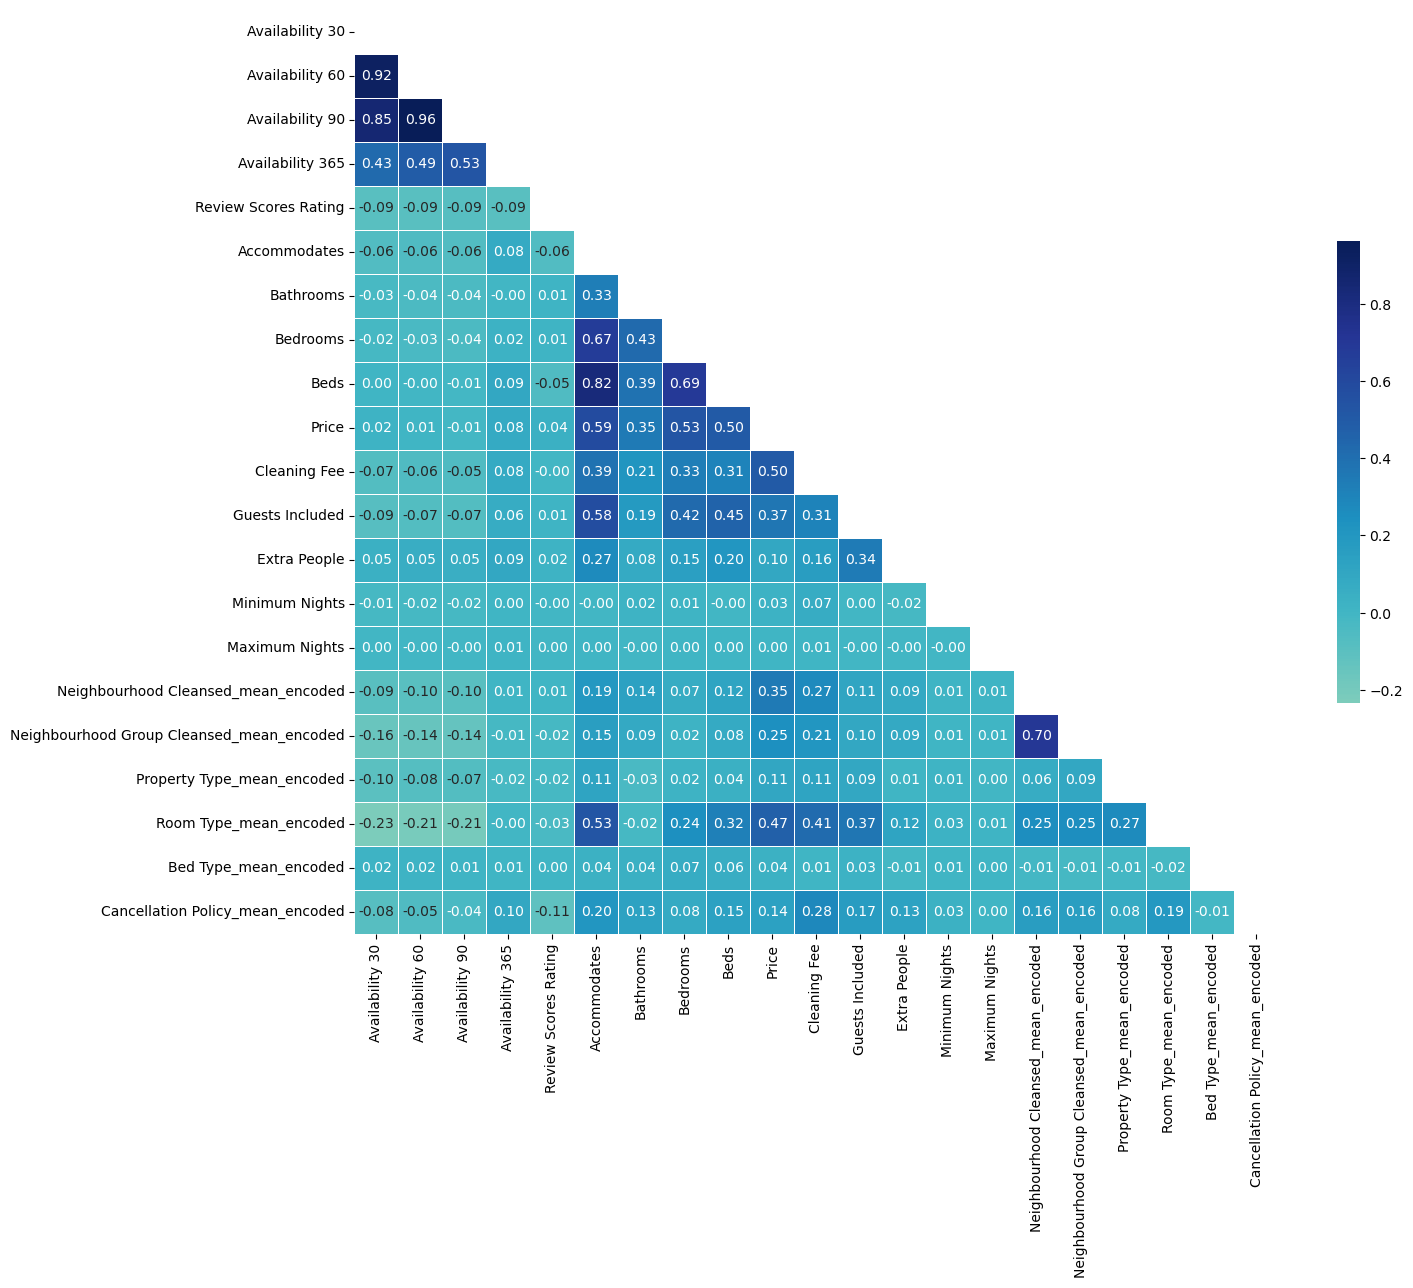

In [124]:
# Correlación

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Codificación de las variables categóricas con respecto al precio. Las añado como columnas nuevas al df sin eliminar las originales
global_price_mean = data_train['Price'].mean()

for col in data_train.select_dtypes(include='object').columns:
    data_train[col + '_mean_encoded'] = data_train.groupby(col)['Price'].transform('mean')
    data_train[col + '_mean_encoded'].fillna(global_price_mean, inplace=True)

corr_all = data_train.corr()

# Máscara para ocultar el triángulo superior de la matriz
mask = np.zeros_like(corr_all, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(corr_all, mask=mask, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cmap="YlGnBu", cbar_kws={"shrink": .5})

# Resultado
plt.show()

# Conclusiones del mapa de calor

- Existen correlaciones positivas moderadas entre las variables relacionadas con la capacidad de la propiedad (Accomodates, Bedrooms, Beds) y el precio (Price), lo que sugiere que propiedades más     grandes tienden a tener precios más altos, lo cual es intuitivo y lo esperado.
- Availability 365 muestra una correlación negativa con las reseñas, lo que podría indicar que propiedades con peores puntuaciones tienen una alta disponibilidad durante todo el año. También podría ser algo esperado.
- Availability 60 y 90 parecen tener una correlación positiva entre sí y con Availability 30. Es lógico ya que son indicadores progresivos del mismo atributo a lo largo del tiempo.
- Minimum y Maximum nights parecen tener muy poca o ninguna relación significativa con otras variables, lo que sugiere que estas restricciones son relativamente independientes de las características de la propiedad y el precio.
- Cleaning Fee muestra una correlación positiva con Accommodates, Bedrooms y Beds, lo cual tiene sentido ya que propiedades más grandes pueden incurrir en mayores costes de limpieza.
- Neighbourhood Group tiene una correlación notable con el precio, lo que indica que el precio medio varía significativamente entre diferentes vecindarios.
- También existe una correlación significativa entre Room Type y precio, implicando que el tipo de habitación (casa completa, habitación privada, etc.) es un determinante importante en el precio.
- Las correlaciones entre precio y las variables codificadas Property Type, Bed Type, y Cancellation Policy son relativamente débiles. Esto sugiere que estos atributos tienen un impacto menos directo o menos consistente en el precio en comparación con la ubicación y el tipo de habitación.


## 03. Preprocesamiento:
    a. Eliminación de variables, mediante selección (random forest/Lasso), alta correlación, alto porcentaje de missings, o el método que se considere oportuno.
    b. Generación de variables

# Eliminación de variables

Para determinar qué variables pueden ser irrelevantes normalmente se consideran aquellas que tienen muy poca o ninguna correlación con la variable objetivo (en este caso, el precio). Según el mapa de calor de correlación proporcionado:

- Las variables relacionadas con la disponibilidad (Availability 30, 60, 90, 365) pueden ser relevantes por su correlación con otras, pero si la meta no es predecir disponibilidad futura, podrían no ser necesarias para un modelo centrado en el precio.
- Las variables Review Scores Rating, Minimum Nights, Maximum Nights, Extra People, y las versiones codificadas de Property Type, Bed Type, y Cancellation Policy muestran una correlación débil con el precio y podrían considerarse para eliminarse.
- Las variables codificadas de Neighbourhood y Room Type tienen correlaciones más fuertes y, por lo tanto, pueden ser relevantes.

Si el modelo pretende predecir precios para propiedades específicas en ciertos vecindarios, las variables de Neighbourhood podrían ser cruciales a pesar de su baja correlación general. Además, algunas técnicas de modelado, como los árboles de decisión, pueden manejar características no correlacionadas de manera más efectiva que otros modelos.

In [125]:
# Eliminar variables de baja correlacion
baja_correlacion = ['Review Scores Rating', 'Minimum Nights', 'Maximum Nights', 'Extra People',
                    'Property Type_mean_encoded', 'Bed Type_mean_encoded', 'Cancellation Policy_mean_encoded',
                    ]

data_train = data_train.drop(columns=baja_correlacion)

## 04. Modelado:
    a. Cross validation
    b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis comparar entre ellos.

In [126]:
# Repito parte del código generado anteriormente

# Carga de datos

import pandas as pd

data = pd.read_csv('./airbnb-listings.csv',sep=';', decimal='.')
data.head()

# Filtrado de datos para quedarnos únicamente con Madrid

data_madrid = data[data['City'] == 'Madrid']
data_madrid.head()

from sklearn.model_selection import train_test_split

# Eliminación de columnas necesarias
columnas_a_conservar = ['Security Deposit', 'Availability 30', 'Availability 60',
                        'Availability 90', 'Availability 365', 'Review Scores Rating',
                        'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Property Type',
                        'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
                        'Price', 'Cleaning Fee', 'Guests Included', 'Extra People',
                        'Cancellation Policy', 'Square Feet', 'Minimum Nights', 'Maximum Nights']

data_madrid = data_madrid[columnas_a_conservar]

# Análisis y limpieza de NA

# %NA por columna
porcentaje_na = data_madrid.isnull().mean() * 100

# Mayoría de NA
columnas_con_na = porcentaje_na[porcentaje_na >= 50].index

# Eliminación de columnas
data_madrid = data_madrid.drop(columns=columnas_con_na)

# Cambio de NA por 0 para el importe de la limpieza
data_madrid['Cleaning Fee'] = data_madrid['Cleaning Fee'].fillna(0)

# Codificación de las variables categóricas con respecto al precio
for col in data_madrid.select_dtypes(include='object'):
    mean_encoded = data_madrid.groupby(col)['Price'].mean()
    data_madrid[col + '_mean_encoded'] = data_madrid[col].map(mean_encoded)
    # Si hay valores NA después del mean encoding, llenarlos con la media global
    data_madrid[col + '_mean_encoded'].fillna(data_madrid['Price'].mean(), inplace=True)

# Eliminación de las columnas categóricas originales
data_madrid.drop(columns=data_madrid.select_dtypes(include='object'), inplace=True)

# Eliminación de las columnas con baja correlación del análisis previo
baja_correlacion = ['Review Scores Rating', 'Minimum Nights', 'Maximum Nights', 'Extra People',
                    'Property Type_mean_encoded', 'Bed Type_mean_encoded', 'Cancellation Policy_mean_encoded',
                    ]

data_madrid = data_madrid.drop(columns=baja_correlacion)

# Dividir los datos en conjuntos de train y test
# El 20% de los datos se utilizará para pruebas, mientras que el restante 80% se utilizará para entrenamiento
train, test = train_test_split(data_madrid, test_size=0.2, random_state=42)

# Guardar los conjuntos de train y test en ficheros CSV
train.to_csv('./train_madrid.csv', sep=';', index=False, decimal='.')
test.to_csv('./test_madrid.csv', sep=';', index=False, decimal='.')

In [127]:
# Train

data_train = pd.read_csv('train_madrid.csv', sep=';', decimal='.')

print(data_train.head())
print(data_train.describe())
print(data_train.dtypes)

# División y escalado

from sklearn import preprocessing

y_train = data_train['Price']
x_train = data_train.drop('Price', axis=1)

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)

# Resultado
print(x_train_scaled.head().T)

   Availability 30  Availability 60  Availability 90  Availability 365  \
0                3                9               16               176   
1                8                8                8                46   
2                9               23               47               208   
3                0                0                6               261   
4                0                4               34               309   

   Accommodates  Bathrooms  Bedrooms  Beds  Price  Cleaning Fee  \
0             4        2.0       1.0   2.0   98.0           0.0   
1             2        2.0       1.0   2.0   25.0           0.0   
2             5        1.0       2.0   2.0   75.0          30.0   
3             2        3.0       1.0   1.0   25.0          15.0   
4             2        2.0       1.0   1.0   17.0          15.0   

   Guests Included  Neighbourhood Cleansed_mean_encoded  \
0                2                            82.514667   
1                1                

In [128]:
# Test

data_test = pd.read_csv('test_madrid.csv', sep=';', decimal='.')

print(data_test.head())
print(data_test.describe())
print(data_test.dtypes)

# División y escalado

from sklearn import preprocessing

y_test = data_test['Price']
x_test = data_test.drop('Price', axis=1)

scaler = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Resultado
print(x_test_scaled.head().T)

   Availability 30  Availability 60  Availability 90  Availability 365  \
0               16               31               54               142   
1                0                0                0                 0   
2                0                0                0                70   
3                0               10               10               139   
4                6               15               29               247   

   Accommodates  Bathrooms  Bedrooms  Beds  Price  Cleaning Fee  \
0             4        1.0       1.0   1.0   79.0          30.0   
1             2        1.0       1.0   2.0   15.0           0.0   
2             4        1.5       2.0   2.0  100.0          50.0   
3             1        1.0       1.0   1.0   27.0           0.0   
4             2        1.0       0.0   1.0   42.0           0.0   

   Guests Included  Neighbourhood Cleansed_mean_encoded  \
0                1                            78.065619   
1                1                

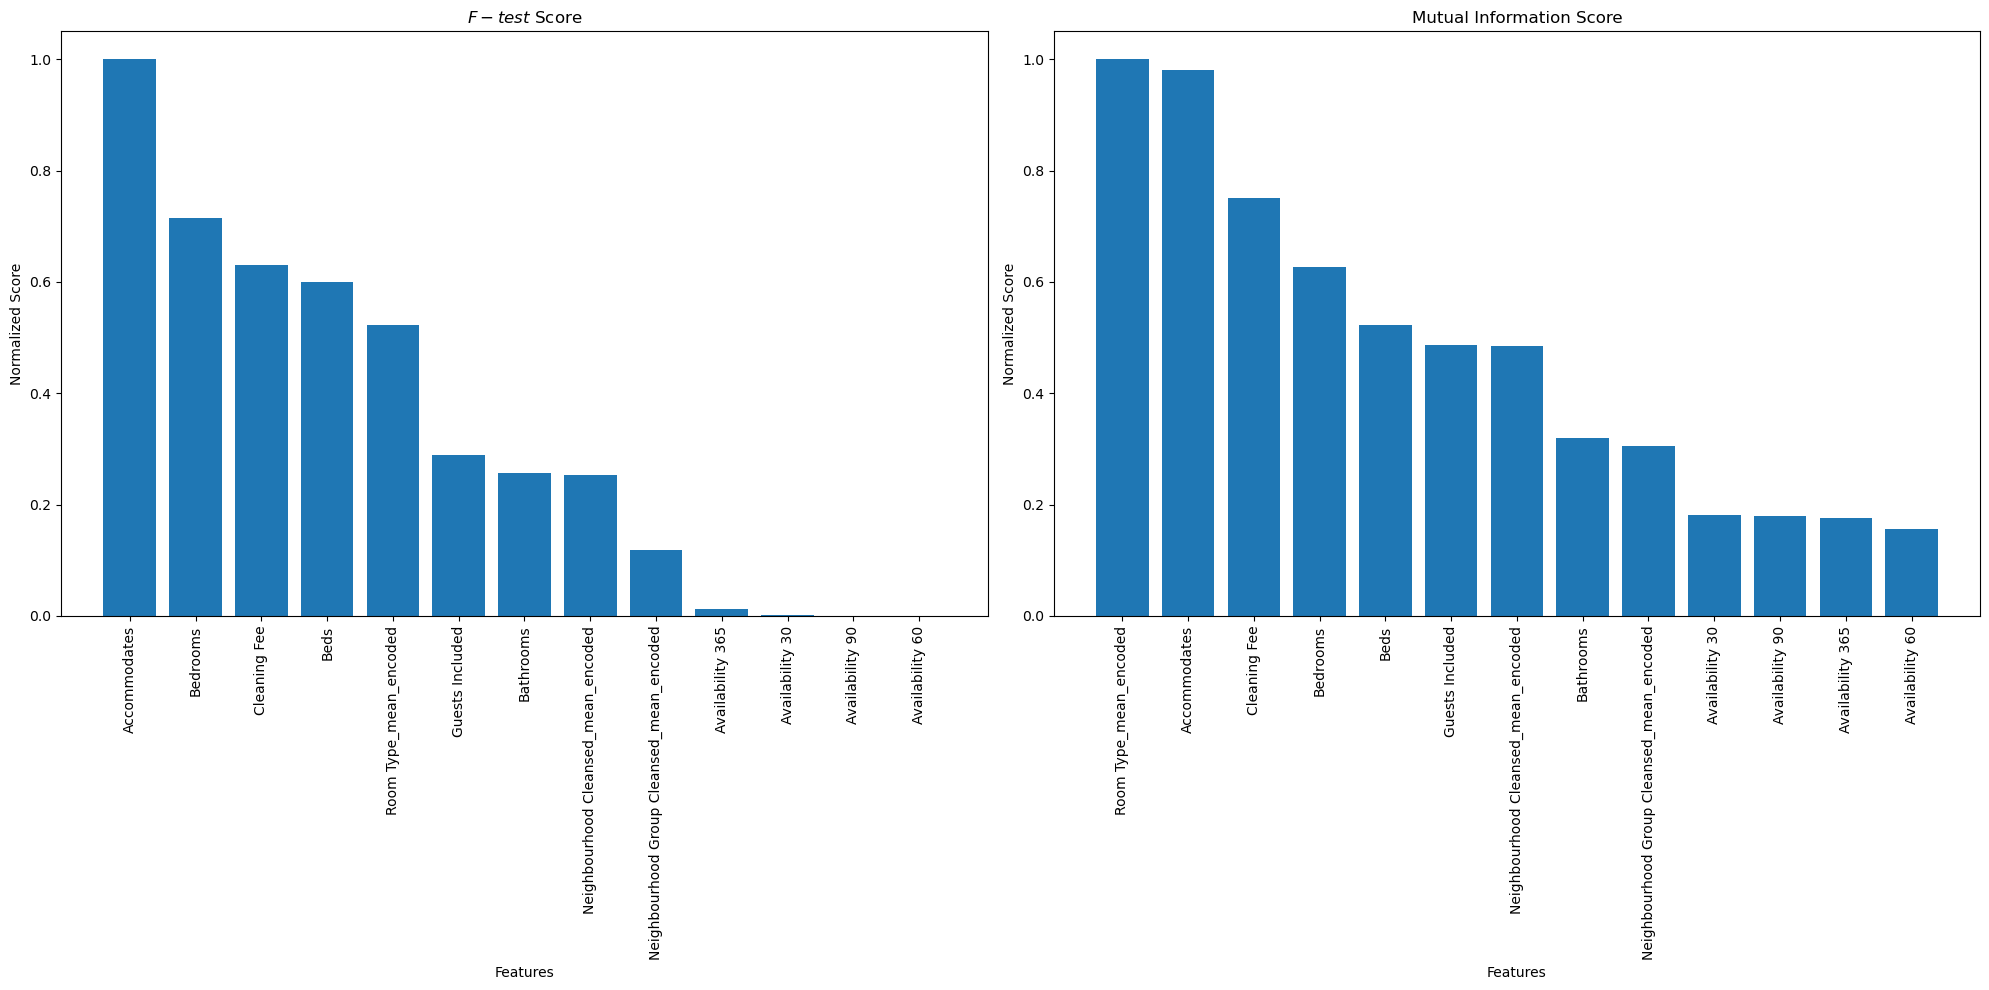

In [129]:
# Comparativa

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression, mutual_info_regression

# Imputación para x_train
imputer_X = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer_X.fit_transform(x_train), columns=x_train.columns)

# Imputación para y_train
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = pd.Series(imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel())

# Cálculo de scores F-test
f_scores, _ = f_regression(x_train_imputed, y_train_imputed)
f_scores /= np.max(f_scores)

# Cálculo de scores de información mutua
mi_scores = mutual_info_regression(x_train_imputed, y_train_imputed)
mi_scores /= np.max(mi_scores)

# Dfs
f_scores_df = pd.DataFrame({'Feature': x_train_imputed.columns, 'F-test Score': f_scores})
mi_scores_df = pd.DataFrame({'Feature': x_train_imputed.columns, 'MI Score': mi_scores})

# Ranking score
f_scores_df = f_scores_df.sort_values(by='F-test Score', ascending=False)
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

plt.figure(figsize=(20, 10))

# Gráfico para F-test scores
plt.subplot(1, 2, 1)
plt.bar(f_scores_df['Feature'], f_scores_df['F-test Score'], align="center")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Normalized Score')
plt.title('$F-test$ Score')

# Gráfico para MI scores
plt.subplot(1, 2, 2)
plt.bar(mi_scores_df['Feature'], mi_scores_df['MI Score'], align="center")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Normalized Score')
plt.title('Mutual Information Score')

plt.tight_layout()
plt.show()

Ambos métodos sugieren que la tipología de la propiedad (como el tipo de habitación) y su capacidad son factores importantes en la determinación del precio en la plataforma de Airbnb.

Por otro lado, la disponibilidad a lo largo de diferentes períodos no parece ser tan relevante para predecir el precio. Las variables Availability 365, Availability 30, Availability 60 y Availability 90 tienen puntajes consistentemente bajos en ambas métricas. Estas variables no proporcionan mucha información útil y podría introducir colinealidad. Podrían ser candidatas para ser eliminadas del modelo o mantener solo una de ellas.

# Regresión polinómica

In [130]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Preprocesamos los datos imputando cualquier valor NaN
imputer_X = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer_X.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer_X.transform(x_test), columns=x_test.columns)

imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = pd.Series(imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel())
y_test_imputed = pd.Series(imputer_y.transform(y_test.values.reshape(-1, 1)).ravel())

In [131]:
# 1. Definir el modelo de regresión polinómica como un pipeline
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

In [132]:
# 2. Definir los grados a probar
parameters = {
    'poly__degree': [1, 2, 3],
}

In [133]:
# 3. Ajustar con los datos de entrenamiento

gridsearch = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
gridsearch.fit(x_train_imputed, y_train_imputed)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [134]:
# 4. Imprimir el mejor grado y ajusta la regresión con ese grado
print(f'El mejor grado calculado: {gridsearch.best_params_["poly__degree"]}')

El mejor grado calculado: 2


In [135]:
# 5. Entrenar el modelo con el mejor grado calculado
best_model = gridsearch.best_estimator_
best_model.fit(x_train_imputed, y_train_imputed)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('linear', LinearRegression())])

In [136]:
# 6. Predecir y calcular el MSE con el mejor modelo
y_train_pred = best_model.predict(x_train_imputed)
y_test_pred = best_model.predict(x_test_imputed)

train_mse = mean_squared_error(y_train_imputed, y_train_pred)
test_mse = mean_squared_error(y_test_imputed, y_test_pred)

print(f'MSE de entrenamiento: {train_mse}')
print(f'MSE de prueba: {test_mse}')

MSE de entrenamiento: 1099.7759856944417
MSE de prueba: 1458.1057664883701


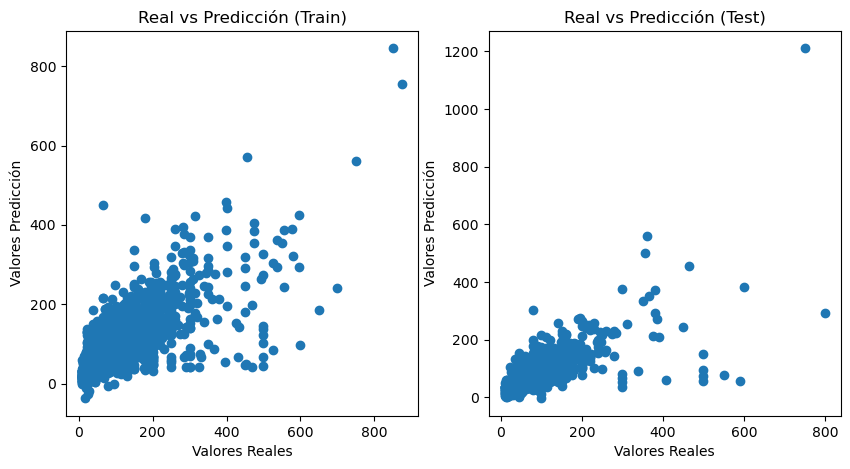

In [137]:
# 7. Resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_imputed, y_train_pred)
plt.title('Real vs Predicción (Train)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predicción')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.title('Real vs Predicción (Test)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predicción')

plt.show()

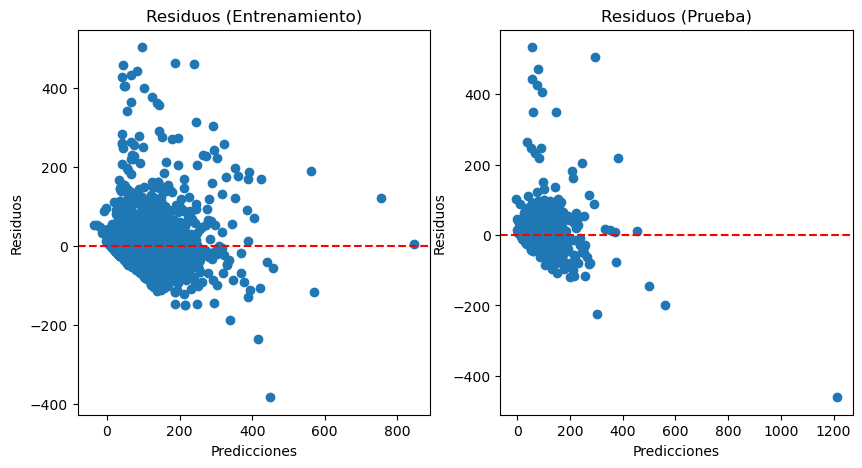

In [138]:
# 8. Residuos
residuos_train = y_train_imputed - y_train_pred
residuos_test = y_test - y_test_pred

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuos_train)
plt.title('Residuos (Entrenamiento)')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(0, linestyle='--', color='r')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuos_test)
plt.title('Residuos (Prueba)')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(0, linestyle='--', color='r')

plt.show()

Las predicciones en el conjunto de entrenamiento están dispersas, especialmente para valores reales más altos. Aunque hay una concentración de predicciones alrededor de los valores reales bajos, lo que indica cierto grado de precisión, la dispersión aumenta con los valores reales más altos, lo que sugiere que el modelo podría estar teniendo dificultades para predecir con precisión en ese rango.

Los resultados de prueba muestran un patrón similar al del entrenamiento, con una dispersión considerable y posiblemente incluso mayor. Esto es un indicio de que el modelo podría estar sobreajustando a los datos de entrenamiento y no generaliza bien a datos no vistos. Además, hay varias predicciones que son significativamente más altas que cualquier valor real, lo cual podría ser un indicativo de outliers o una alta varianza en el modelo.

Los residuos muestran una dispersión que aumenta con el valor de las predicciones, lo cual es una indicación de heterocedasticidad.
Hay una cantidad considerable de residuos grandes tanto en entrenamiento como en prueba, más notablemente en la prueba, lo que sugiere que el modelo tiene dificultades para hacer predicciones precisas para algunos puntos. Esto podría ser debido a la alta varianza en los datos o a un sobreajuste del modelo.
La línea roja discontinua que representa el residuo cero muestra que hay muchos puntos por debajo y por encima, indicando que el modelo tanto sobreestima como subestima los valores en diferentes rangos

Conclusiones Generales:

- Sobreajuste: La diferencia en la dispersión entre los datos de entrenamiento y de prueba sugiere sobreajuste, ya que el modelo parece realizar predicciones más precisas en los datos de entrenamiento.
- Complejidad del modelo: La regresión polinómica podría ser demasiado compleja para los datos, capturando ruido en lugar de la señal subyacente.
- Necesidad de regularización: Podría ser útil aplicar regularización (como Lasso o Ridge) para controlar la complejidad del modelo y mejorar la generalización.
- Revisión de outliers: Deberían revisarse los casos donde las predicciones exceden significativamente los valores reales para entender si son errores del modelo o si hay algo inusual en esos datos.
- Evaluación de características: Puede ser necesario revisar las características utilizadas para la modelización y considerar la inclusión de interacciones más significativas o la eliminación de características ruidosas.

# Ridge Regression

In [139]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Preprocesamos los datos imputando cualquier valor NaN
imputer_X = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer_X.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer_X.transform(x_test), columns=x_test.columns)

imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = pd.Series(imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel())
y_test_imputed = pd.Series(imputer_y.transform(y_test.values.reshape(-1, 1)).ravel())

In [140]:
# Modelo de Ridge
ridge = Ridge(alpha=1.0)

In [141]:
# Entrenamiento
ridge.fit(x_train_imputed, y_train_imputed)

Ridge()

In [142]:
# Predicciones
y_train_pred = ridge.predict(x_train_imputed)
y_test_pred = ridge.predict(x_test_imputed)

In [143]:
# MSE
train_mse = mean_squared_error(y_train_imputed, y_train_pred)
test_mse = mean_squared_error(y_test_imputed, y_test_pred)

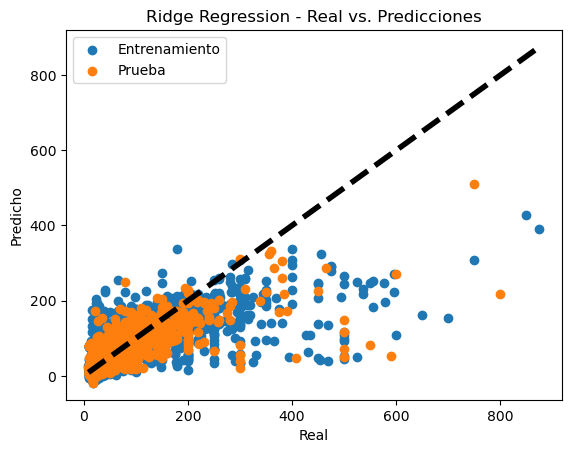

In [144]:
# Gráfico
plt.scatter(y_train_imputed, y_train_pred, label='Entrenamiento')
plt.scatter(y_test_imputed, y_test_pred, label='Prueba')
plt.plot([y_train_imputed.min(), y_train_imputed.max()], [y_train_imputed.min(), y_train_imputed.max()], 'k--', lw=4)
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.title('Ridge Regression - Real vs. Predicciones')
plt.legend()
plt.show()

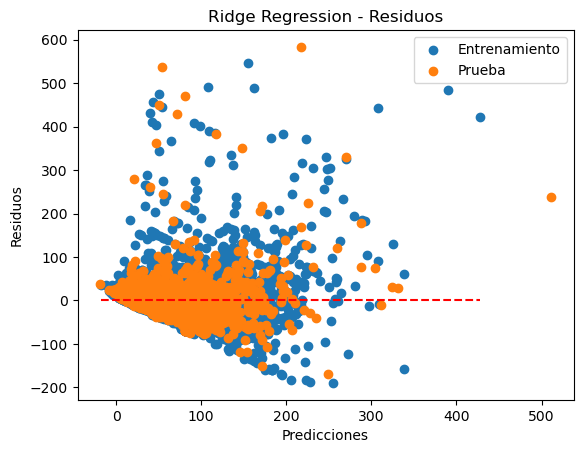

In [145]:
# Residuos
plt.scatter(y_train_pred, y_train_imputed - y_train_pred, label='Entrenamiento')
plt.scatter(y_test_pred, y_test_imputed - y_test_pred, label='Prueba')
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Ridge Regression - Residuos')
plt.legend()
plt.show()

Valores reales vs. predicciones:

- Se observa que para valores bajos de la variable objetivo, el modelo realiza predicciones razonablemente bien, ya que muchos puntos están cerca de la línea de predicción perfecta.
- Para valores más altos, el modelo tiende a subestimar. Esto es particularmente notable en el conjunto de prueba donde algunos puntos se desvían significativamente de la línea.
- La dispersión de los puntos sugiere que el modelo podría tener un desempeño variable, haciendo bien algunas predicciones y fallando en otras, especialmente en los extremos de los valores objetivo.

Residuos:

- Los residuos se dispersan ampliamente a medida que aumentan las predicciones, lo que indica que la varianza de los errores de predicción no es constante.
- Además, parece haber más residuos positivos a medida que las predicciones aumentan, lo que indica que el modelo tiende a subestimar los valores reales para valores altos de la variable objetivo.

Conclusiones generales:

- El modelo parece tener un buen rendimiento para valores bajos a medios de la variable objetivo, pero se queda corto para valores más altos, tanto en entrenamiento como en prueba.
- La subestimación sistemática de los valores más altos y la presencia de heterocedasticidad podrían indicar que se necesitan ajustes en el modelo.
- El sobreajuste no parece ser un problema significativo aquí, ya que los patrones de residuos son bastante consistentes entre los conjuntos de entrenamiento y prueba, aunque la precisión disminuye con valores más altos de la variable objetivo.

# Lasso Regression

In [146]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Preprocesamos los datos imputando cualquier valor NaN
imputer_X = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer_X.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer_X.transform(x_test), columns=x_test.columns)

imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = pd.Series(imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel())
y_test_imputed = pd.Series(imputer_y.transform(y_test.values.reshape(-1, 1)).ravel())

In [147]:
# Crear y entrenar el modelo Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(x_train_imputed, y_train_imputed)

Lasso(alpha=0.01)

In [148]:
# Predicciones
y_train_pred = lasso.predict(x_train_imputed)
y_test_pred = lasso.predict(x_test_imputed)

In [149]:
# MSE
train_mse = mean_squared_error(y_train_imputed, y_train_pred)
test_mse = mean_squared_error(y_test_imputed, y_test_pred)
print(f'MSE de entrenamiento: {train_mse}')
print(f'MSE de prueba: {test_mse}')

MSE de entrenamiento: 1416.3093931680364
MSE de prueba: 1581.7259510932965


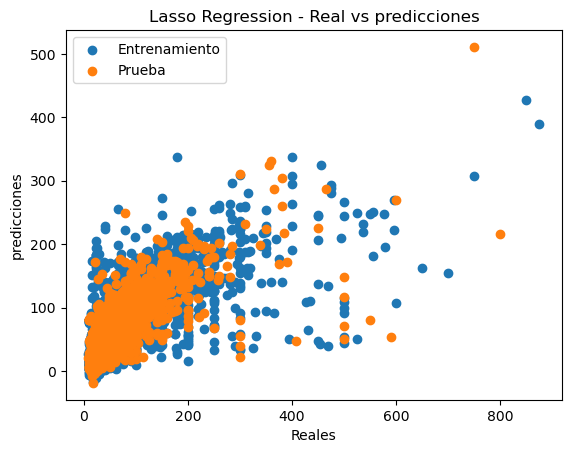

In [150]:
# Gráfico de valores reales vs predicciones
plt.scatter(y_train_imputed, y_train_pred, label='Entrenamiento')
plt.scatter(y_test_imputed, y_test_pred, label='Prueba')
plt.legend()
plt.xlabel('Reales')
plt.ylabel('predicciones')
plt.title('Lasso Regression - Real vs predicciones')
plt.show()

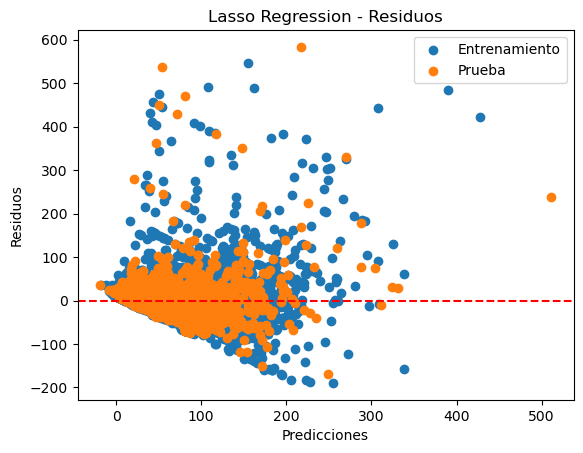

In [151]:
# Residuos
plt.scatter(y_train_pred, y_train_imputed - y_train_pred, label='Entrenamiento')
plt.scatter(y_test_pred, y_test_imputed - y_test_pred, label='Prueba')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Lasso Regression - Residuos')
plt.show()

Real vs. predicciones:

- Los puntos en el gráfico de "Real vs. predicciones" están dispersos y no siguen una línea diagonal clara, lo que indica que hay variabilidad en las predicciones del modelo.
- Tanto en el entrenamiento como en la prueba, el modelo parece tener dificultad para capturar la tendencia de los valores más altos, ya que hay una concentración de predicciones en la gama baja y media del eje y, independientemente de los valores reales en el eje x.
- En el conjunto de prueba, algunos puntos con valores reales altos son subestimados por el modelo, lo que se puede ver por los puntos que están muy por debajo de la línea de 45 grados (que representaría una predicción perfecta).

Residuos:

- Hay una dispersión notable de residuos que no se centra alrededor de cero, especialmente en el conjunto de prueba, donde algunos residuos son significativamente negativos, lo que indica predicciones que están por encima del valor real.
- La dispersión de residuos en el conjunto de prueba es más amplia que en el conjunto de entrenamiento, lo que podría indicar que el modelo se desempeña peor en datos no vistos, sugiriendo potencialmente un sobreajuste o una falta de generalización.

# Árbol de decisión

In [152]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Preprocesamos los datos imputando cualquier valor NaN
imputer_X = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer_X.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer_X.transform(x_test), columns=x_test.columns)

imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = pd.Series(imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel())
y_test_imputed = pd.Series(imputer_y.transform(y_test.values.reshape(-1, 1)).ravel())

In [153]:
# Crear y entrenar el modelo de árbol de decisión
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(x_train_imputed, y_train_imputed)

DecisionTreeRegressor(random_state=42)

In [154]:
# Predicciones
y_train_pred = decision_tree.predict(x_train_imputed)
y_test_pred = decision_tree.predict(x_test_imputed)

In [155]:
# MSE
train_mse = mean_squared_error(y_train_imputed, y_train_pred)
test_mse = mean_squared_error(y_test_imputed, y_test_pred)
print(f'MSE de entrenamiento: {train_mse}')
print(f'MSE de prueba: {test_mse}')

MSE de entrenamiento: 47.90625139912409
MSE de prueba: 2945.7008161526287


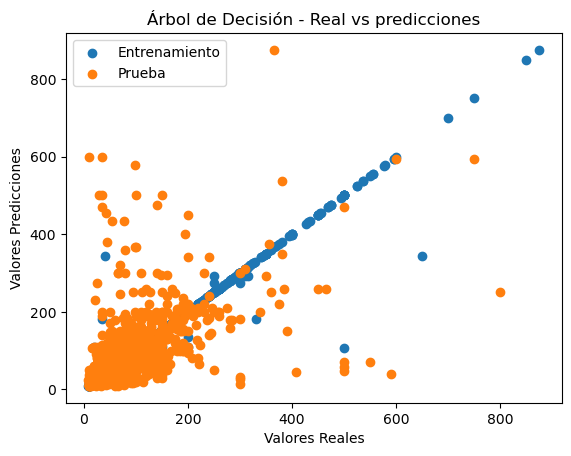

In [156]:
# Gráfico de valores reales vs predicciones
plt.scatter(y_train_imputed, y_train_pred, label='Entrenamiento')
plt.scatter(y_test_imputed, y_test_pred, label='Prueba')
plt.legend()
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predicciones')
plt.title('Árbol de Decisión - Real vs predicciones')
plt.show()

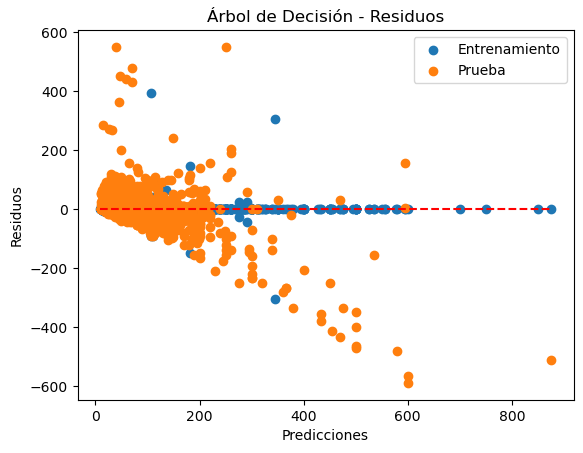

In [157]:
# Residuos
plt.scatter(y_train_pred, y_train_imputed - y_train_pred, label='Entrenamiento')
plt.scatter(y_test_pred, y_test_imputed - y_test_pred, label='Prueba')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), color='red', linestyle='--')
plt.legend()
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Árbol de Decisión - Residuos')
plt.show()

Real vs. predicciones:

- En el conjunto de entrenamiento, los valores de las predicciones se alinean casi perfectamente con los valores reales, lo que indica un posible sobreajuste, ya que los árboles de decisión son propensos a capturar el ruido de los datos de entrenamiento.
- En el conjunto de prueba, las predicciones no son tan precisas, y hay una dispersión notable de los puntos respecto a la línea de predicción perfecta, lo que sugiere que el modelo no generaliza bien a datos no vistos.
- Hay valores extremos, especialmente en el conjunto de prueba, que el modelo no predice con precisión, lo que se refleja en los puntos que están lejos de la línea de predicción perfecta.

Residuos:

- Los residuos en el conjunto de entrenamiento son pequeños y cercanos a cero, lo que es consistente con el sobreajuste.
- Los residuos en el conjunto de prueba tienen una varianza mucho mayor, con algunos residuos extremadamente negativos, lo que indica que el modelo ha sobrestimado algunos valores significativamente.
- La línea de residuos cero muestra que hay una tendencia de los residuos a aumentar a medida que aumenta el valor de la predicción, lo que indica heterocedasticidad.

Conclusiones principales:

- El modelo de árbol de decisión parece estar sobreajustado, lo que es típico de los árboles si no se restringe su profundidad o se poda adecuadamente.
- La capacidad de generalización es una preocupación, ya que las predicciones en el conjunto de prueba tienen una varianza mucho mayor que en el conjunto de entrenamiento.
- Los resultados sugieren que podrían ser necesarias técnicas para reducir el sobreajuste, como el uso de árboles más pequeños, poda, o métodos de ensamble como Random Forest o Gradient Boosting.

# Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Preprocesamos los datos imputando cualquier valor NaN
imputer_X = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer_X.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer_X.transform(x_test), columns=x_test.columns)

imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = pd.Series(imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel())
y_test_imputed = pd.Series(imputer_y.transform(y_test.values.reshape(-1, 1)).ravel())

In [159]:
# Entrenar el modelo
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(x_train_imputed, y_train_imputed)

RandomForestRegressor(random_state=42)

In [160]:
# Realizar predicciones y evaluar el modelo
y_train_pred = forest.predict(x_train_imputed)
y_test_pred = forest.predict(x_test_imputed)

train_mse = mean_squared_error(y_train_imputed, y_train_pred)
test_mse = mean_squared_error(y_test_imputed, y_test_pred)

print(f"MSE - Entrenamiento: {train_mse}")
print(f"MSE - Prueba: {test_mse}")

MSE - Entrenamiento: 191.9046937435948
MSE - Prueba: 1356.7440841337088


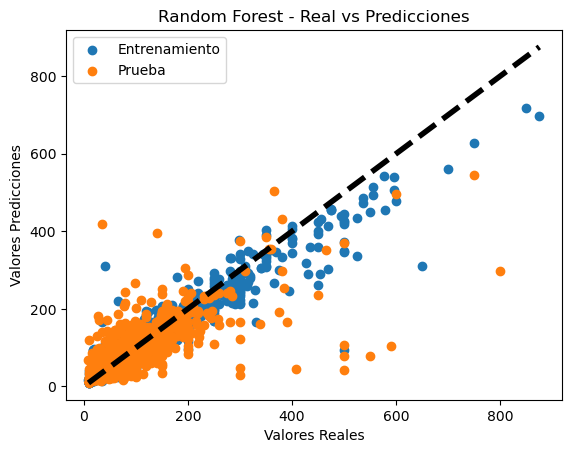

In [161]:
# Resultados
plt.scatter(y_train_imputed, y_train_pred, label='Entrenamiento')
plt.scatter(y_test_imputed, y_test_pred, label='Prueba')
plt.plot([y_train_imputed.min(), y_train_imputed.max()], [y_train_imputed.min(), y_train_imputed.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predicciones')
plt.title('Random Forest - Real vs Predicciones')
plt.legend()
plt.show()

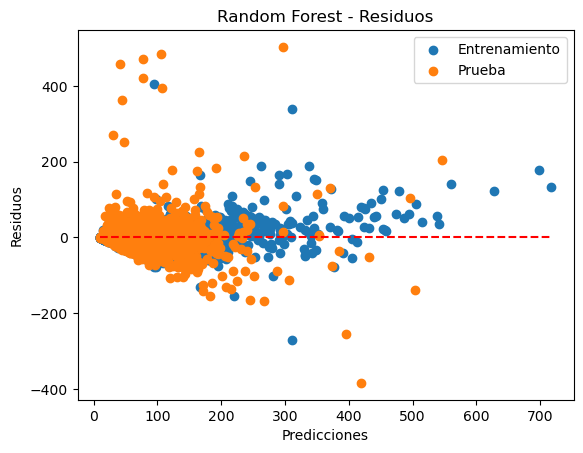

In [162]:
residuos_train = y_train_imputed - y_train_pred
residuos_test = y_test_imputed - y_test_pred

plt.scatter(y_train_pred, residuos_train, label='Entrenamiento')
plt.scatter(y_test_pred, residuos_test, label='Prueba')
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Random Forest - Residuos')
plt.legend()
plt.show()

Real vs. predicciones:

- El modelo muestra una buena alineación de las predicciones con los valores reales en el conjunto de entrenamiento, como se ve por los puntos azules que están cerca de la línea discontinua. Esto sugiere un buen ajuste a los datos de entrenamiento.
- En el conjunto de prueba, aunque hay una tendencia general de las predicciones a seguir los valores reales, existe una dispersión más notable. Algunos valores reales altos no son bien capturados por el modelo, lo que indica posibles limitaciones en la capacidad del modelo para generalizar a nuevos datos.
- La presencia de valores de predicciones muy altos en el conjunto de prueba, que no se corresponden con los valores reales, sugiere que el modelo puede estar sobreestimando en ciertos casos.

Residuos:

- Los residuos del conjunto de entrenamiento están más concentrados alrededor de la línea cero, lo que es coherente con un buen rendimiento en el entrenamiento.
- Los residuos del conjunto de prueba muestran una dispersión mayor, lo que indica un error de predicción más variado y posiblemente mayores errores en algunos casos.
- La forma de la dispersión de residuos sugiere que el modelo puede tener dificultades con la heterocedasticidad, ya que los errores parecen aumentar con el valor de la predicción.

Conclusiones generales:

- El modelo de Random Forest tiene un buen ajuste en el conjunto de entrenamiento pero muestra signos de sobreajuste.
- La heterocedasticidad en los residuos y las predicciones sobreestimadas en el conjunto de prueba pueden indicar que el modelo necesita ajustes.

# Gradient Boosting

In [163]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Preprocesamos los datos imputando cualquier valor NaN
imputer_X = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer_X.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer_X.transform(x_test), columns=x_test.columns)

imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = pd.Series(imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel())
y_test_imputed = pd.Series(imputer_y.transform(y_test.values.reshape(-1, 1)).ravel())

In [164]:
# Entrenar el modelo
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(x_train_imputed, y_train_imputed)

GradientBoostingRegressor(random_state=42)

In [165]:
# Realizar predicciones y evaluar el modelo
y_train_pred = gbr.predict(x_train_imputed)
y_test_pred = gbr.predict(x_test_imputed)

train_mse = mean_squared_error(y_train_imputed, y_train_pred)
test_mse = mean_squared_error(y_test_imputed, y_test_pred)

print(f"MSE - Entrenamiento: {train_mse}")
print(f"MSE - Prueba: {test_mse}")

MSE - Entrenamiento: 866.5915172753149
MSE - Prueba: 1259.5636999987069


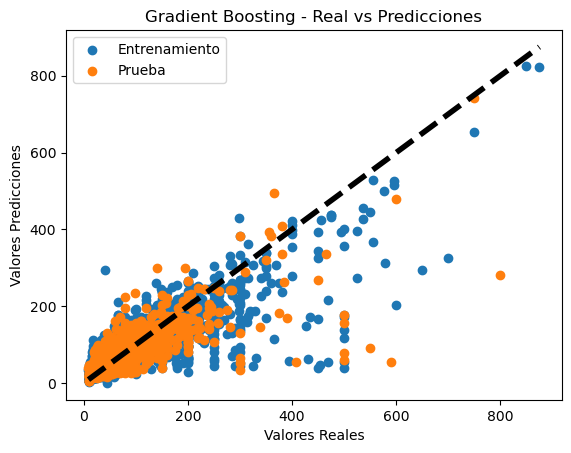

In [166]:
# Resultados
plt.scatter(y_train_imputed, y_train_pred, label='Entrenamiento')
plt.scatter(y_test_imputed, y_test_pred, label='Prueba')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predicciones')
plt.title('Gradient Boosting - Real vs Predicciones')
plt.legend()
plt.show()

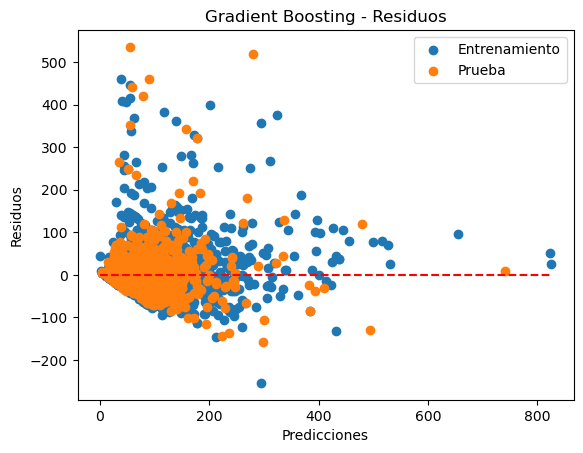

In [167]:
# Residuos

residuos_train = y_train_imputed - y_train_pred
residuos_test = y_test_imputed - y_test_pred

plt.scatter(y_train_pred, residuos_train, label='Entrenamiento')
plt.scatter(y_test_pred, residuos_test, label='Prueba')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), colors='red', linestyles='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gradient Boosting - Residuos')
plt.legend()
plt.show()

Real vs. predicciones:

- Los puntos del conjunto de entrenamiento están muy cerca de la línea de predicción perfecta, lo que indica un buen ajuste del modelo a estos datos.
- El conjunto de prueba muestra una dispersión mayor, lo que es esperable, pero aún así las predicciones parecen seguir una buena correlación con los valores reales.
- Sin embargo, hay algunas predicciones en el conjunto de prueba que se desvían significativamente de la línea de predicción perfecta, lo que puede indicar errores puntuales o la presencia de valores atípicos.

Residuos:

- Para el conjunto de entrenamiento, los residuos están bastante centrados alrededor de cero, aunque hay cierta dispersión, lo cual es normal.
- Para el conjunto de prueba, los residuos también están dispersos, pero no hay una clara tendencia de que los residuos aumenten o disminuyan con el valor de las predicciones. Esto indica que el modelo no está sesgado hacia la sobrestimación o subestimación sistemática en el conjunto de prueba.
- Sin embargo, algunos residuos grandes en el conjunto de prueba sugieren que el modelo no captura ciertos aspectos de los datos, posiblemente debido a la variabilidad natural de los datos o a características que no están siendo capturadas por el modelo.

Conclusiones principales:

- El modelo de Gradient Boosting muestra un buen ajuste y es capaz de capturar la tendencia de los datos en ambos conjuntos, aunque con un rendimiento ligeramente menor en el conjunto de prueba, lo cual es común.
- No hay evidencia clara de sobreajuste, ya que los patrones de residuos entre el entrenamiento y la prueba son consistentes.

# Bagging Regressor

In [168]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Preprocesamos los datos imputando cualquier valor NaN
imputer_X = SimpleImputer(strategy='mean')
x_train_imputed = pd.DataFrame(imputer_X.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer_X.transform(x_test), columns=x_test.columns)

imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = pd.Series(imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel())
y_test_imputed = pd.Series(imputer_y.transform(y_test.values.reshape(-1, 1)).ravel())

In [169]:
# Inicialización
bag_reg = BaggingRegressor(n_estimators=100, random_state=42)

In [170]:
# Entrenamiento del modelo
bag_reg.fit(x_train_imputed, y_train_imputed)

BaggingRegressor(n_estimators=100, random_state=42)

In [171]:
# Predicciones
y_train_pred = bag_reg.predict(x_train_imputed)
y_test_pred = bag_reg.predict(x_test_imputed)

In [172]:
# MSE
train_mse = mean_squared_error(y_train_imputed, y_train_pred)
test_mse = mean_squared_error(y_test_imputed, y_test_pred)

print(f'MSE de entrenamiento: {train_mse}')
print(f'MSE de prueba: {test_mse}')

MSE de entrenamiento: 192.61746022481708
MSE de prueba: 1343.973160957231


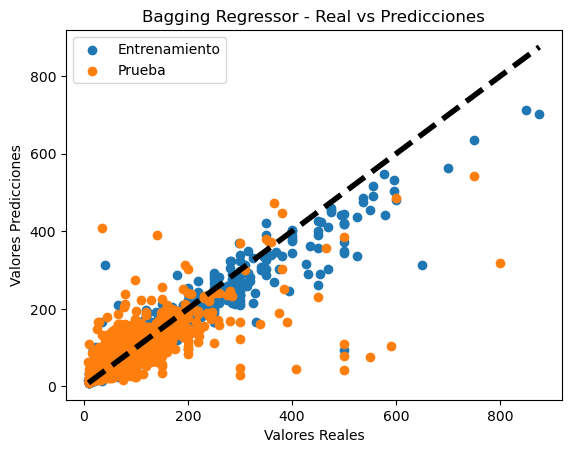

In [173]:
# Resultado
plt.scatter(y_train_imputed, y_train_pred, label='Entrenamiento')
plt.scatter(y_test_imputed, y_test_pred, label='Prueba')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predicciones')
plt.title('Bagging Regressor - Real vs Predicciones')
plt.legend()
plt.show()

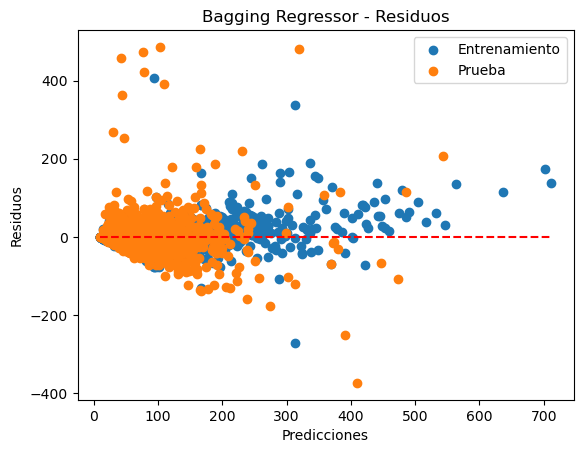

In [174]:
# Residuos
plt.scatter(y_train_pred, y_train - y_train_pred, label='Entrenamiento')
plt.scatter(y_test_pred, y_test - y_test_pred, label='Prueba')
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Bagging Regressor - Residuos')
plt.legend()
plt.show()

Real vs. Predicciones:

- El gráfico muestra que el modelo tiene un buen ajuste para el conjunto de entrenamiento.
- En el conjunto de prueba, aunque las predicciones siguen la tendencia de los valores reales, se observa una dispersión más amplia de los puntos naranja. Esto sugiere que el modelo no es tan preciso para datos no vistos, una señal de que podría haber un cierto grado de sobreajuste.
- Parece haber una dificultad particular para predecir correctamente los valores más altos, ya que algunas predicciones del conjunto de prueba están significativamente por debajo de los valores reales.

Residuos:

- Los residuos para el conjunto de entrenamiento están más concentrados alrededor de la línea cero, lo que sugiere menores errores en las predicciones.
- Para el conjunto de prueba, los residuos están más dispersos y algunos son bastante grandes, lo que indica predicciones inexactas para ciertos datos. Esto puede deberse a variabilidad en los datos o a características que no están siendo capturadas por el modelo.
- La distribución de residuos no muestra patrones obvios que indiquen problemas sistemáticos en el modelo, como sesgo o heterocedasticidad.

Conclusiones principales:

- El modelo de Bagging Regressor parece tener un buen rendimiento general, pero podría estar sobreajustándose al conjunto de entrenamiento.

## 05. Conclusión: escrita, no numérica; un par de líneas es más que suficiente

Todos los modelos de regresión aplicados muestran un buen ajuste en los datos de entrenamiento, pero varían en su capacidad para generalizar a los datos de prueba. El modelo de Random Forest parece ofrecer un balance entre ajuste y capacidad de generalización, mostrando un rendimiento consistente en los residuos y las predicciones. Por tanto, para mi, el Random Forest sería la elección recomendada para este conjunto de datos, dado que maneja bien tanto el sobreajuste como la variabilidad en las predicciones.